In [12]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


In [13]:
start_date = "2022-01-01"
end_date   = "2025-01-09"  # ou str(datetime.now().date()) pour la date du jour

# On récupère les données quotidiennes d’ETH/USD
df = yf.download("ETH-USD", start=start_date, end=end_date, interval='1d')

# On ne garde que la colonne de clôture
df = df[['Close']].rename(columns={'Close': 'price'})
df.dropna(inplace=True)

c:\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [14]:
def simulate_dca(data, 
                 amount_usd,   # Montant investi à chaque fois (en USD, pour simplifier)
                 fee_rate,     # Taux de frais (ex: 0.01 pour 1%)
                 buy_dates):
    """
    Calcule la quantité totale d'ETH accumulée en achetant 'amount_usd' à 
    chaque date dans 'buy_dates', avec 'fee_rate' comme frais.
    data : DataFrame avec un index de type Date et une colonne 'price'
    amount_usd : montant investi à chaque achat (avant frais)
    fee_rate : proportion de frais (ex: 0.01 pour 1%)
    buy_dates : iterable de dates où l'on achète
    """
    total_eth = 0.0
    total_invested = 0.0
    
    for buy_date in buy_dates:
        if buy_date in data.index:
            # Prix du jour
            price = data.loc[buy_date, 'price']
            
            # Montant net après frais
            net_amount = amount_usd * (1 - fee_rate)
            
            # ETH achetés ce jour-là
            eth_bought = net_amount / price
            
            total_eth      += eth_bought
            total_invested += amount_usd  # on compte la somme "brute" investie
    
    # Valeur finale du portefeuille = total_eth * prix du dernier jour de notre DataFrame
    final_price = data['price'].iloc[-1]
    final_value = total_eth * final_price
    
    return {
        "total_eth": total_eth,
        "total_invested": total_invested,
        "final_value": final_value
    }


In [15]:
dates_scenario_achat_1mois = []
current_date = pd.to_datetime(start_date)
end_date_dt  = pd.to_datetime(end_date)

while current_date <= end_date_dt:
    # Si on est le 1er du mois
    if current_date.day == 1:
        dates_scenario_achat_1mois.append(current_date)
    current_date += timedelta(days=1)

results_scenario_achat_1mois = simulate_dca(
    data=df, 
    amount_usd=500,  # 500 "USD"
    fee_rate=0.01,   # 1% de frais
    buy_dates=dates_scenario_achat_1mois
)

In [16]:
dates_scenario_achat_15jours = []
current_date = pd.to_datetime(start_date)

while current_date <= end_date_dt:
    dates_scenario_achat_15jours.append(current_date)
    current_date += timedelta(days=15)  # saut de 15 jours

results_scenario_achat_15jours = simulate_dca(
    data=df, 
    amount_usd=250,
    fee_rate=0.01,   # 1% de frais
    buy_dates=dates_scenario_achat_15jours
)


In [17]:
dates_scenario_achat_7jours = []
current_date = pd.to_datetime(start_date)

while current_date <= end_date_dt:
    dates_scenario_achat_7jours.append(current_date)
    current_date += timedelta(days=7)  # saut de 7 jours

results_scenario_achat_7jours = simulate_dca(
    data=df,
    amount_usd=125,
    fee_rate=0.01,
    buy_dates=dates_scenario_achat_7jours
)

In [18]:
dates_scenario_achat_3jours = []
current_date = pd.to_datetime(start_date)

while current_date <= end_date_dt:
    dates_scenario_achat_3jours.append(current_date)
    current_date += timedelta(days=3)  # saut de 3 jours

results_scenario_achat_3jours = simulate_dca(
    data=df,
    amount_usd=50,
    fee_rate=0.01,
    buy_dates=dates_scenario_achat_3jours
)

=== SCÉNARIO_ACHAT_1MOIS (500 € / 1er du mois) ===
Quantité d'ETH accumulée         : 8.8517
Montant total investi (USD)      : 18500.00 $
Valeur finale du portefeuille    : 29443.56 $

=== SCÉNARIO_ACHAT_15JOURS (250 € / 15 jours) ===
Quantité d'ETH accumulée         : 8.9856
Montant total investi (USD)      : 18500.00 $
Valeur finale du portefeuille    : 29889.17 $

=== SCÉNARIO_ACHAT_7JOURS (125 € / semaine) ===
Quantité d'ETH accumulée         : 9.6277
Montant total investi (USD)      : 19750.00 $
Valeur finale du portefeuille    : 32025.03 $

=== SCÉNARIO_ACHAT_3JOURS (50 € / 3 jours) ===
Quantité d'ETH accumulée         : 8.9657
Montant total investi (USD)      : 18400.00 $
Valeur finale du portefeuille    : 29822.80 $



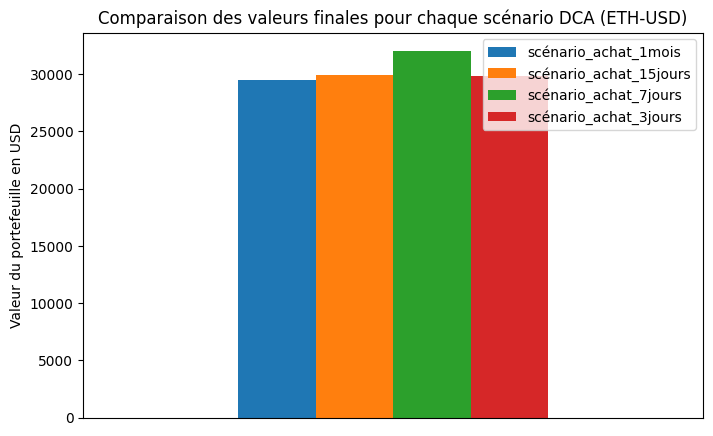

In [19]:
# ------------------------------------------------------------------------------
# 7. AFFICHAGE DES RÉSULTATS
# ------------------------------------------------------------------------------
print("=== SCÉNARIO_ACHAT_1MOIS (500 € / 1er du mois) ===")
print(f"Quantité d'ETH accumulée         : {results_scenario_achat_1mois['total_eth']:.4f}")
print(f"Montant total investi (USD)      : {results_scenario_achat_1mois['total_invested']:.2f} $")
print(f"Valeur finale du portefeuille    : {results_scenario_achat_1mois['final_value']:.2f} $\n")

print("=== SCÉNARIO_ACHAT_15JOURS (250 € / 15 jours) ===")
print(f"Quantité d'ETH accumulée         : {results_scenario_achat_15jours['total_eth']:.4f}")
print(f"Montant total investi (USD)      : {results_scenario_achat_15jours['total_invested']:.2f} $")
print(f"Valeur finale du portefeuille    : {results_scenario_achat_15jours['final_value']:.2f} $\n")

print("=== SCÉNARIO_ACHAT_7JOURS (125 € / semaine) ===")
print(f"Quantité d'ETH accumulée         : {results_scenario_achat_7jours['total_eth']:.4f}")
print(f"Montant total investi (USD)      : {results_scenario_achat_7jours['total_invested']:.2f} $")
print(f"Valeur finale du portefeuille    : {results_scenario_achat_7jours['final_value']:.2f} $\n")

print("=== SCÉNARIO_ACHAT_3JOURS (50 € / 3 jours) ===")
print(f"Quantité d'ETH accumulée         : {results_scenario_achat_3jours['total_eth']:.4f}")
print(f"Montant total investi (USD)      : {results_scenario_achat_3jours['total_invested']:.2f} $")
print(f"Valeur finale du portefeuille    : {results_scenario_achat_3jours['final_value']:.2f} $\n")

# ------------------------------------------------------------------------------
# 8. ILLUSTRATION GRAPHIQUE (FACULTATIF)
# ------------------------------------------------------------------------------
results_df = pd.DataFrame({
    "scénario_achat_1mois"  : [results_scenario_achat_1mois["final_value"]],
    "scénario_achat_15jours": [results_scenario_achat_15jours["final_value"]],
    "scénario_achat_7jours" : [results_scenario_achat_7jours["final_value"]],
    "scénario_achat_3jours" : [results_scenario_achat_3jours["final_value"]]
})

results_df.plot(kind='bar', figsize=(8, 5))
plt.title("Comparaison des valeurs finales pour chaque scénario DCA (ETH-USD)")
plt.ylabel("Valeur du portefeuille en USD")
plt.xticks([])
plt.show()
